# Part I

## Import libraries req

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

## Loading data

In [2]:
usa_train = pd.read_csv('USA_train.csv',parse_dates=["Year"],index_col="Year")
usa_test = pd.read_csv('USA_test.csv',parse_dates=["Year"],index_col="Year") 

In [3]:
submission = pd.read_csv("subm1.csv")
usa_test['Yield (Pounds/ Harvested Area)'] = submission['Yield (Pounds/ Harvested Area)'].values[:400]

In [4]:
usa_data = pd.concat((usa_train,usa_test))
usa_data.tail()

,State,Planted (1000 Acres),Harvested (1000 Acres),Yield (Pounds/ Harvested Area),Average Temperature Value,Average Temperature Anomaly,Maximum Temperature Value,Maximum Temperature Anomaly,Minimum Temperature Value,Minimum Temperature Anomaly,...,Heating Degree Days Value,Heating Degree Days Anomaly,Palmer Drought Severity Index (PDSI) Value,Palmer Drought Severity Index (PDSI) Anomaly,Palmer Hydrological Drought Index (PHDI) Value,Palmer Hydrological Drought Index (PHDI) Anomaly,Palmer Modified Drought Index (PMDI) Value,Palmer Modified Drought Index (PMDI) Anomaly,Palmer Z-Index Value,Palmer Z-Index Anomaly
Year,,,,,,,,,,,,,,,,,,,,,
2022-01-01,OK,660,310,320.193581,62.900000,NaN,78.133333,5.116667,48.683333,2.766667,...,307.000000,3.583333,-0.355000,-2.042500,-0.355000,-2.168333,-0.256667,1.038333,0.125833,1.884167
2022-01-01,SC,270,265,680.832190,67.808333,3.791667,79.041667,2.608333,55.591667,5.008333,...,209.500000,-12.083333,2.810833,1.106667,2.596667,1.772500,0.732500,-0.065833,1.554167,0.610000
2022-01-01,TN,335,325,470.851467,61.516667,3.475000,70.900000,NaN,48.091667,2.191667,...,NaN,-2.000000,3.145833,3.346667,3.726667,2.779167,3.088333,4.300833,3.023333,3.728333
2022-01-01,TX,"7,900","2,500",404.357747,69.516667,5.208333,83.441667,4.833333,57.550000,2.566667,...,164.916667,5.666667,NaN,-2.430000,-3.491667,-1.742500,-0.339167,-1.484167,1.290833,0.240833
2022-01-01,VA,90,89,757.724005,58.166667,3.583333,71.375000,4.808333,46.933333,1.341667,...,354.333333,-9.500000,0.614167,1.389167,0.055000,1.674167,0.610000,NaN,2.103333,1.971667


In [5]:
print(f"Shape of \n- Train : {usa_train.shape}\n- Test : {usa_test.shape}\n- Total data : {usa_data.shape} ")

Shape of 
- Train : (560, 24)
- Test : (400, 24)
- Total data : (960, 24) 


In [6]:
colList = usa_train.columns.to_list()

In [7]:
# REPLACING THE STRING VALUES FROM PLANTED AND HARVESTED COLUMN

usa_data["Planted (1000 Acres)"] = usa_data["Planted (1000 Acres)"].str.replace(",","")
usa_data["Harvested (1000 Acres)"] = usa_data["Harvested (1000 Acres)"].str.replace(",","")

In [8]:
# FILLING NAN VALUES WITH 1E-6 TO CONVERT IT INTO INT OBJECT

usa_data['Planted (1000 Acres)'] = usa_data['Planted (1000 Acres)'].fillna(-1e6)
usa_data['Harvested (1000 Acres)'] = usa_data['Harvested (1000 Acres)'].fillna(-1e6)

In [9]:
# CONVERTING IT INTO INT64 OBJECT

usa_data['Planted (1000 Acres)'] = usa_data['Planted (1000 Acres)'].astype(np.int64)
usa_data['Harvested (1000 Acres)'] = usa_data['Harvested (1000 Acres)'].astype(np.int64)
# usa_data['Yield (Pounds/ Harvested Area)'] = usa_data['Yield (Pounds/ Harvested Area)'].astype(np.int64)

# usa_test['Planted (1000 Acres)'] = usa_test['Planted (1000 Acres)'].astype(np.int64)
# usa_test['Harvested (1000 Acres)'] = usa_test['Harvested (1000 Acres)'].astype(np.int64)
# usa_test['Yield (Pounds/ Harvested Area)'] = usa_test['Yield (Pounds/ Harvested Area)'].astype(np.int64)

In [10]:
# REPLACING 1E-6 WITH NAN TO PERFORM INTERPOLATION LATER

usa_data.replace(-1e6,np.nan,inplace=True)

In [11]:
usa_data[usa_data['State']=='AL']

,State,Planted (1000 Acres),Harvested (1000 Acres),Yield (Pounds/ Harvested Area),Average Temperature Value,Average Temperature Anomaly,Maximum Temperature Value,Maximum Temperature Anomaly,Minimum Temperature Value,Minimum Temperature Anomaly,...,Heating Degree Days Value,Heating Degree Days Anomaly,Palmer Drought Severity Index (PDSI) Value,Palmer Drought Severity Index (PDSI) Anomaly,Palmer Hydrological Drought Index (PHDI) Value,Palmer Hydrological Drought Index (PHDI) Anomaly,Palmer Modified Drought Index (PMDI) Value,Palmer Modified Drought Index (PMDI) Anomaly,Palmer Z-Index Value,Palmer Z-Index Anomaly
Year,,,,,,,,,,,,,,,,,,,,,
1975-01-01,AL,385.0,370.0,406.000000,66.825000,1.566667,75.066667,2.266667,54.566667,2.866667,...,224.916667,-1.083333,8.161667,6.840833,NaN,4.684167,6.132500,5.821667,4.857500,2.718333
1976-01-01,AL,440.0,420.0,400.000000,64.675000,NaN,73.891667,1.091667,49.408333,NaN,...,274.916667,45.916667,6.087500,4.766667,4.087500,4.610000,3.723333,4.412500,1.408333,1.269167
1977-01-01,AL,405.0,395.0,339.000000,64.458333,3.200000,77.375000,3.575000,54.550000,2.850000,...,264.416667,37.416667,1.480833,4.160000,4.674167,3.196667,3.518333,1.207500,4.012500,2.873333
1978-01-01,AL,325.0,315.0,444.000000,65.866667,1.608333,75.933333,1.133333,53.791667,2.091667,...,278.416667,50.416667,0.509167,3.188333,0.885000,0.407500,2.672500,0.361667,1.576667,0.437500
1979-01-01,AL,310.0,305.0,512.000000,63.358333,2.100000,76.725000,-0.075000,51.991667,0.291667,...,267.333333,39.333333,4.295000,5.974167,6.155000,2.677500,6.143333,2.832500,2.251667,4.112500
1980-01-01,AL,325.0,321.0,415.000000,63.466667,3.208333,76.466667,3.666667,NaN,2.791667,...,265.500000,39.500000,3.371667,2.050833,4.883333,4.405833,2.789167,1.478333,3.019167,0.880000
1981-01-01,AL,377.0,372.0,546.000000,62.983333,-0.275000,76.341667,2.541667,50.633333,1.933333,...,261.500000,32.500000,-0.412500,-1.733333,-1.630000,0.892500,0.535000,-1.775833,3.186667,0.047500
1982-01-01,AL,287.0,285.0,777.000000,65.341667,1.083333,75.750000,0.950000,53.925000,4.225000,...,219.500000,-8.500000,4.674167,1.353333,0.766667,0.289167,1.269167,1.958333,4.448333,3.309167
1983-01-01,AL,219.0,215.0,413.000000,64.191667,0.933333,76.508333,1.708333,50.875000,1.175000,...,276.166667,46.166667,5.430000,6.109167,NaN,5.952500,3.783333,5.472500,5.223333,5.084167


In [12]:
grp_obj = usa_data.groupby(['Year'])

In [17]:
df = grp_obj.sum()

In [18]:
commod_prices = pd.read_csv("USA_Commodity_prices.csv",parse_dates=['Year'],index_col="Year")
commod_prices.head()

,Cotton_Price[Dollar/ton]
Year,
1975-01-01,1055.792518
1976-01-01,1582.035312
1977-01-01,1399.933700
1978-01-01,1350.109288
1979-01-01,1428.152836


In [19]:
df['Cotton_Price[Dollar/ton]'] = commod_prices['Cotton_Price[Dollar/ton]']

In [20]:
df.head()

,Planted (1000 Acres),Harvested (1000 Acres),Yield (Pounds/ Harvested Area),Average Temperature Value,Average Temperature Anomaly,Maximum Temperature Value,Maximum Temperature Anomaly,Minimum Temperature Value,Minimum Temperature Anomaly,Precipitation Value,...,Heating Degree Days Anomaly,Palmer Drought Severity Index (PDSI) Value,Palmer Drought Severity Index (PDSI) Anomaly,Palmer Hydrological Drought Index (PHDI) Value,Palmer Hydrological Drought Index (PHDI) Anomaly,Palmer Modified Drought Index (PMDI) Value,Palmer Modified Drought Index (PMDI) Anomaly,Palmer Z-Index Value,Palmer Z-Index Anomaly,Cotton_Price[Dollar/ton]
Year,,,,,,,,,,,,,,,,,,,,,
1975-01-01,9140.0,8731.0,8741.0,1047.350000,33.216667,1383.841667,22.808333,939.466667,38.100000,115.205833,...,168.083333,91.670000,86.025833,91.902500,74.294167,84.131667,91.265833,56.849167,52.125000,1055.792518
1976-01-01,11515.0,10869.0,8964.0,1072.483333,12.158333,1383.425000,18.716667,953.858333,-2.850000,102.857500,...,524.250000,45.390000,36.745833,35.472500,35.233333,50.142500,43.460833,46.752500,43.730000,1582.035312
1977-01-01,13604.0,12265.0,8815.0,1166.916667,38.016667,1474.550000,45.275000,983.650000,35.166667,108.105833,...,449.333333,30.449167,30.036667,29.021667,27.023333,34.964167,18.056667,51.404167,44.993333,1399.933700
1978-01-01,13297.0,12324.0,8588.0,1035.258333,14.991667,1385.441667,16.758333,784.466667,14.200000,103.625000,...,914.166667,52.460833,51.109167,48.783333,52.160000,45.125000,41.849167,53.745833,45.002500,1350.109288
1979-01-01,13886.0,12741.0,9655.0,1200.691667,16.700000,1373.283333,6.800000,971.883333,11.875000,122.420833,...,816.000000,86.799167,88.245000,88.070000,93.403333,92.870000,85.855833,66.784167,59.191667,1428.152836


In [21]:
df = df.interpolate(method="linear")

In [22]:
df['t'] = np.round((df.index - df.index.min())/ np.timedelta64(1,"Y"))

In [23]:
from feature_engine.timeseries.forecasting import LagFeatures

lag_transformer = LagFeatures(variables=colList[1:],freq=['1YS','2YS','3YS','4YS','5YS'])
data_ = lag_transformer.fit_transform(df)

In [24]:
from feature_engine.timeseries.forecasting import WindowFeatures

win_transformer = WindowFeatures(variables=colList[1:],functions=["mean", "std"],freq="1YS")
data_window = win_transformer.fit_transform(df)

In [25]:
data_ = pd.concat([data_,data_window],axis=1)
data_ = data_.loc[:,~data_.columns.duplicated()]

In [26]:
data_.fillna(method="bfill",inplace=True)
data_.head()

,Planted (1000 Acres),Harvested (1000 Acres),Yield (Pounds/ Harvested Area),Average Temperature Value,Average Temperature Anomaly,Maximum Temperature Value,Maximum Temperature Anomaly,Minimum Temperature Value,Minimum Temperature Anomaly,Precipitation Value,...,Palmer Hydrological Drought Index (PHDI) Anomaly_window_3_mean,Palmer Hydrological Drought Index (PHDI) Anomaly_window_3_std,Palmer Modified Drought Index (PMDI) Value_window_3_mean,Palmer Modified Drought Index (PMDI) Value_window_3_std,Palmer Modified Drought Index (PMDI) Anomaly_window_3_mean,Palmer Modified Drought Index (PMDI) Anomaly_window_3_std,Palmer Z-Index Value_window_3_mean,Palmer Z-Index Value_window_3_std,Palmer Z-Index Anomaly_window_3_mean,Palmer Z-Index Anomaly_window_3_std
Year,,,,,,,,,,,,,,,,,,,,,
1975-01-01,9140.0,8731.0,8741.0,1047.350000,33.216667,1383.841667,22.808333,939.466667,38.100000,115.205833,...,45.516944,25.257621,56.412778,25.176339,50.927778,37.171386,51.668611,5.053525,46.949444,4.526454
1976-01-01,11515.0,10869.0,8964.0,1072.483333,12.158333,1383.425000,18.716667,953.858333,-2.850000,102.857500,...,45.516944,25.257621,56.412778,25.176339,50.927778,37.171386,51.668611,5.053525,46.949444,4.526454
1977-01-01,13604.0,12265.0,8815.0,1166.916667,38.016667,1474.550000,45.275000,983.650000,35.166667,108.105833,...,45.516944,25.257621,56.412778,25.176339,50.927778,37.171386,51.668611,5.053525,46.949444,4.526454
1978-01-01,13297.0,12324.0,8588.0,1035.258333,14.991667,1385.441667,16.758333,784.466667,14.200000,103.625000,...,45.516944,25.257621,56.412778,25.176339,50.927778,37.171386,51.668611,5.053525,46.949444,4.526454
1979-01-01,13886.0,12741.0,9655.0,1200.691667,16.700000,1373.283333,6.800000,971.883333,11.875000,122.420833,...,38.138889,12.817749,43.410556,7.733042,34.455556,14.224698,50.634167,3.559684,44.575278,0.732046


In [27]:
train= data_[data_.index<pd.to_datetime("2003-01-01")]
test = data_[data_.index>=pd.to_datetime("2003-01-01")]

In [34]:
features = [col for col in data_.columns]
print(f"Number of features {len(features)}")

Number of features 186


In [38]:
features.remove("Cotton_Price[Dollar/ton]")

In [39]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
data_scaled = sc.fit_transform(train[features+['t']])

In [40]:
y = train['Cotton_Price[Dollar/ton]'].to_frame()
X = data_scaled

In [41]:
model = Lasso(alpha=0.1)
model.fit(X,y)

Lasso(alpha=0.1)

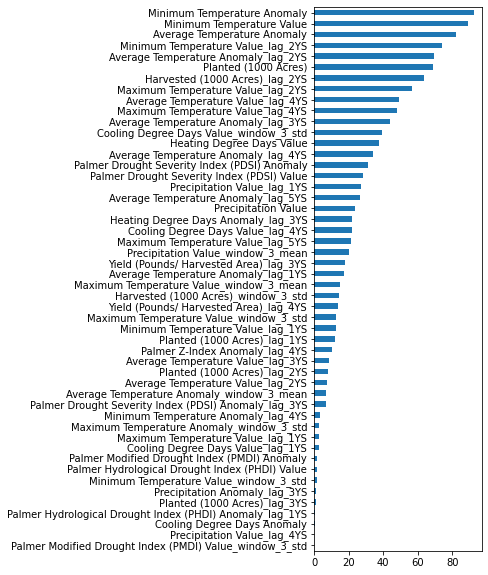

In [42]:
feat_importances = pd.Series(index=features+['t'], data=model.coef_)
imp_features = feat_importances.abs()\
               [(feat_importances.abs()>0)].iloc[::-1].\
               sort_values(ascending=True).\
               plot(kind="barh", figsize=(3, 10))

In [43]:
imp_features_list = list(feat_importances.abs()[(feat_importances.abs()>0)].iloc[::-1].index)

In [44]:
from lightgbm import LGBMRegressor
from sktime.transformations.series.time_since import TimeSince

In [45]:
forecast_start = train.iloc[-1].name+pd.DateOffset(months=12)
forecast_steps = 20
model = LGBMRegressor(
                        min_data_in_bin=1,
                        min_data_in_leaf=1,
                        boosting = "gbdt",
                        linear_tree = True,
                        linear_lambda = 0.01,
                        n_estimators = 200,
                        bagging_freq = 1,
                        bagging_fraction = 0.8,
    
)
forecast_horizon = pd.date_range(
   forecast_start , periods=forecast_steps, freq="YS"
)

In [46]:
df_train = data_[data_.index<forecast_start]
df_test = data_[data_.index>=forecast_start]

In [47]:
feature_lis = imp_features_list
feature_lis.append('t')

y_train = y
X_train = df_train[feature_lis]

# y_test = df_test['Yield (Pounds/ Harvested Area)']
X_test = df_test[feature_lis]

In [48]:
from sklearn.preprocessing import MinMaxScaler
sc =MinMaxScaler()

X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

In [49]:
model.fit(X_train_sc,y_train)

[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] min_data_in_leaf is set=1, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=1
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


LGBMRegressor(bagging_fraction=0.8, bagging_freq=1, boosting='gbdt',
              linear_lambda=0.01, linear_tree=True, min_data_in_bin=1,
              min_data_in_leaf=1, n_estimators=200)

In [50]:
def preprocess_pipeline(df,sc=sc,ifl=list(imp_features_list),col=colList):
    
    lag_transformer = LagFeatures(variables=col[1:],freq=['1YS','2YS','3YS','4YS','5YS'])
    df = lag_transformer.fit_transform(df)

    win_transformer = WindowFeatures(variables=colList[1:],functions=["mean", "std"],freq="1YS")
    data_window = win_transformer.fit_transform(df)
    
    data_ = pd.concat([df,data_window],axis=1)
    df = data_.loc[:,~data_.columns.duplicated()]
    
    df.fillna(method="bfill",inplace=True)
    
#     df.drop('State',axis=1,inplace=True)
    
    predf = df.loc[:,ifl]
    
    return predf

In [51]:
forecast_horizon = pd.date_range(X_test.index.min(),periods=20,freq="YS")

train_df= df[df.index<pd.to_datetime("2003-01-01")]
test_df = df[df.index>=pd.to_datetime("2003-01-01")]

df_pred = train_df.copy()
df_pred = pd.concat([df_pred,test_df])

for forecast_time in forecast_horizon:
    X_test_ = preprocess_pipeline(df_pred)
    X_test_ = X_test_.loc[[forecast_time]]
    X_test_ = sc.transform(X_test_)
    y_pred = model.predict(X_test_)
#     print(y_pred)
    df_pred.loc[[forecast_time],'Cotton_Price[Dollar/ton]'] = y_pred

In [52]:
df_pred

,Planted (1000 Acres),Harvested (1000 Acres),Yield (Pounds/ Harvested Area),Average Temperature Value,Average Temperature Anomaly,Maximum Temperature Value,Maximum Temperature Anomaly,Minimum Temperature Value,Minimum Temperature Anomaly,Precipitation Value,...,Palmer Drought Severity Index (PDSI) Value,Palmer Drought Severity Index (PDSI) Anomaly,Palmer Hydrological Drought Index (PHDI) Value,Palmer Hydrological Drought Index (PHDI) Anomaly,Palmer Modified Drought Index (PMDI) Value,Palmer Modified Drought Index (PMDI) Anomaly,Palmer Z-Index Value,Palmer Z-Index Anomaly,Cotton_Price[Dollar/ton],t
Year,,,,,,,,,,,,,,,,,,,,,
1975-01-01,9140.0,8731.0,8741.000000,1047.350000,33.216667,1383.841667,22.808333,939.466667,38.100000,115.205833,...,91.670000,86.025833,91.902500,74.294167,84.131667,91.265833,56.849167,52.125000,1055.792518,0.0
1976-01-01,11515.0,10869.0,8964.000000,1072.483333,12.158333,1383.425000,18.716667,953.858333,-2.850000,102.857500,...,45.390000,36.745833,35.472500,35.233333,50.142500,43.460833,46.752500,43.730000,1582.035312,1.0
1977-01-01,13604.0,12265.0,8815.000000,1166.916667,38.016667,1474.550000,45.275000,983.650000,35.166667,108.105833,...,30.449167,30.036667,29.021667,27.023333,34.964167,18.056667,51.404167,44.993333,1399.933700,2.0
1978-01-01,13297.0,12324.0,8588.000000,1035.258333,14.991667,1385.441667,16.758333,784.466667,14.200000,103.625000,...,52.460833,51.109167,48.783333,52.160000,45.125000,41.849167,53.745833,45.002500,1350.109288,3.0
1979-01-01,13886.0,12741.0,9655.000000,1200.691667,16.700000,1373.283333,6.800000,971.883333,11.875000,122.420833,...,86.799167,88.245000,88.070000,93.403333,92.870000,85.855833,66.784167,59.191667,1428.152836,4.0
1980-01-01,14461.0,13143.0,7870.000000,1167.116667,39.766667,1410.241667,37.750000,876.691667,37.075000,113.113333,...,52.239167,45.595000,54.194167,62.115833,53.205833,48.581667,41.575833,46.277500,1869.517760,5.0
1981-01-01,13621.0,13783.0,10394.000000,1095.258333,33.308333,1402.325000,48.950000,933.116667,35.266667,105.718333,...,13.371667,22.285833,3.220000,1.297500,10.169167,11.597500,46.205000,35.743333,1697.116476,6.0
1982-01-01,10804.0,9408.0,11820.000000,1175.883333,36.000000,1303.025000,26.925000,996.491667,38.491667,113.908333,...,73.771667,61.388333,60.125833,54.664167,62.670833,63.698333,64.342500,57.581667,1446.892106,7.0
1983-01-01,7743.0,7284.0,8842.000000,1208.891667,15.716667,1440.941667,21.366667,987.658333,27.641667,123.667500,...,79.440833,75.998333,82.673333,81.988333,93.833333,75.838333,64.775833,78.267500,1655.008234,8.0


<AxesSubplot:xlabel='Year'>

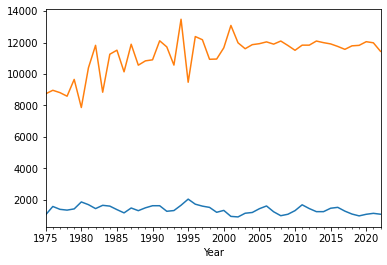

In [53]:
df_pred['Cotton_Price[Dollar/ton]'].plot()
df_pred['Yield (Pounds/ Harvested Area)'].plot()

In [57]:
submission = pd.read_csv("sub_v7.csv")
submission.head()

,Yield (Pounds/ Harvested Area),COTTON YIELD (Kg per ha),Cotton_Price[Dollar/ton]
0,549.132608,2673.218800,1003.584113
1,857.515147,5050.211089,1229.892703
2,1287.418454,3445.832507,1123.508756
3,1212.418100,4658.499680,1090.443378
4,527.186770,3886.032346,1099.946828


In [58]:
df_pred[df_pred.index>=pd.to_datetime("2003-01-01")]["Cotton_Price[Dollar/ton]"].values

array([1151.76272343, 1200.21007439, 1440.28734005, 1613.58309309,
       1244.92763455,  995.20821298, 1086.87030019, 1316.87328349,
       1687.68243309, 1449.02655603, 1252.95763973, 1252.77544756,
       1469.70076034, 1525.7593317 , 1285.53355693, 1099.86899893,
        983.79480592, 1085.70220293, 1145.69327392, 1089.39560971])

In [59]:
submission["Cotton_Price[Dollar/ton]"]=np.append(df_pred[df_pred.index>=pd.to_datetime("2003-01-01")]["Cotton_Price[Dollar/ton]"].values,np.zeros(2456))

In [60]:
submission.to_csv('sub_v9.csv',index=False)

# Part-II

IL
KY
NV

In [648]:
State_name = usa_data.State.unique()[19]
State_name

'VA'

In [649]:
# TAKING A SUBSET OF DATA BELONGING TO ONE STATE

State_data = usa_data[usa_data['State']==State_name]

In [650]:
# IMPUTE THE MISSING DATA

State_imp = State_data.interpolate(method='linear')
State_imp = State_imp.interpolate(method='bfill')

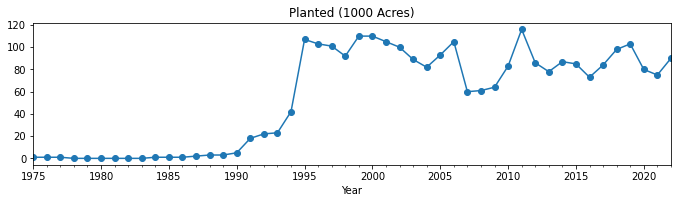

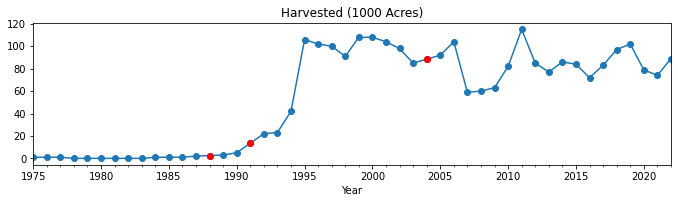

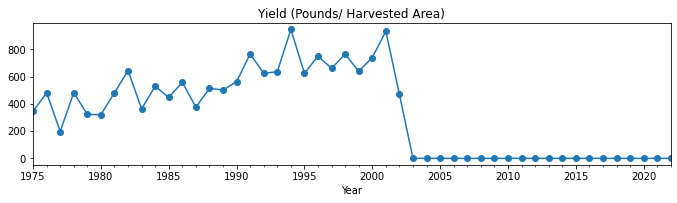

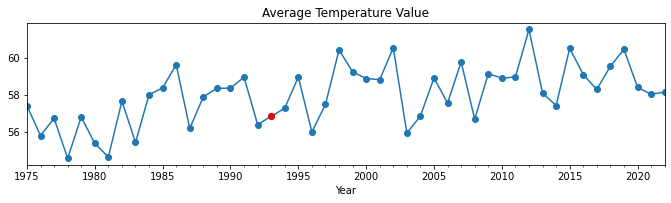

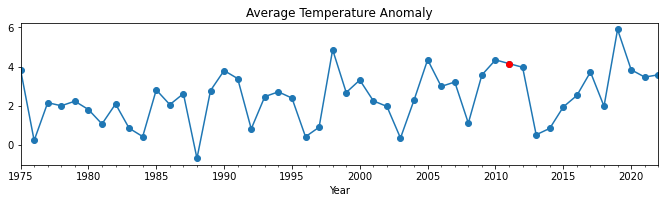

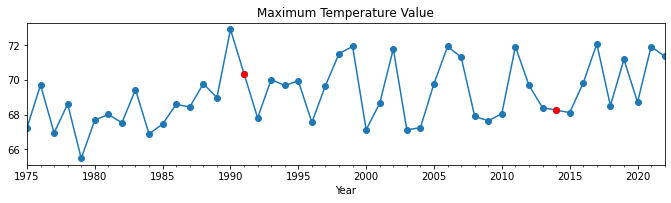

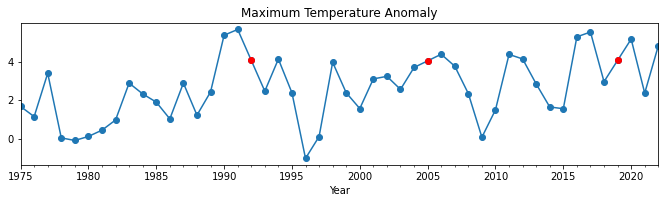

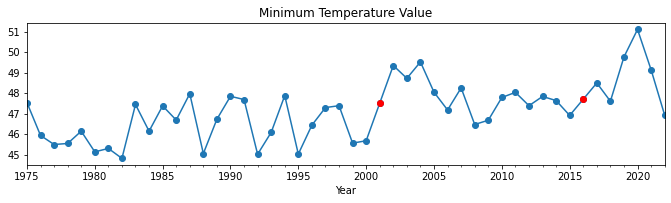

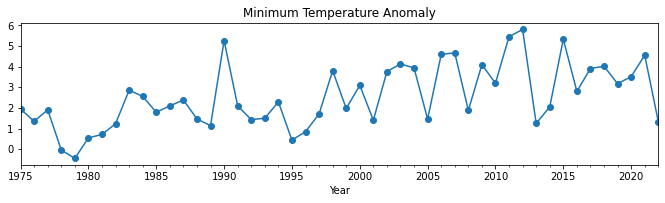

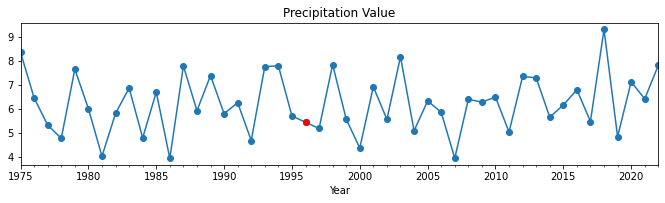

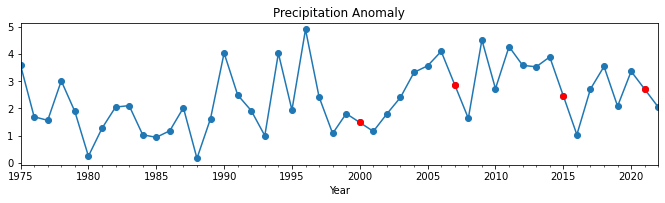

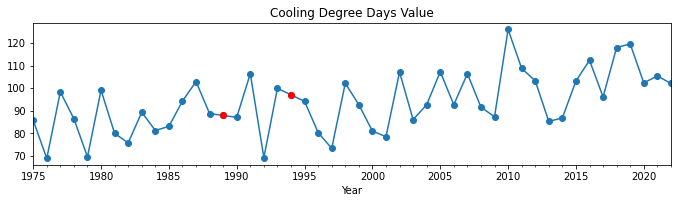

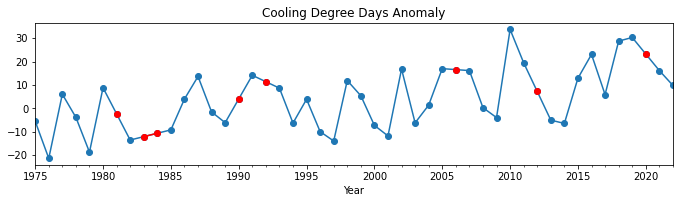

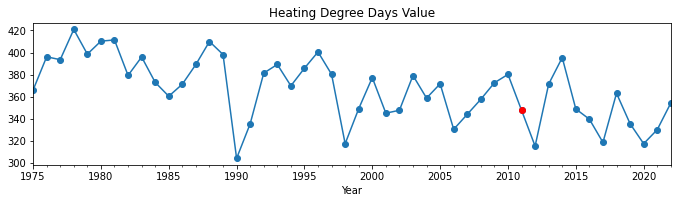

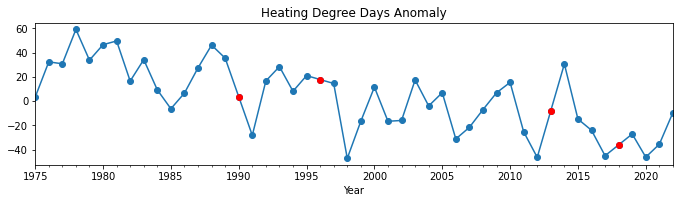

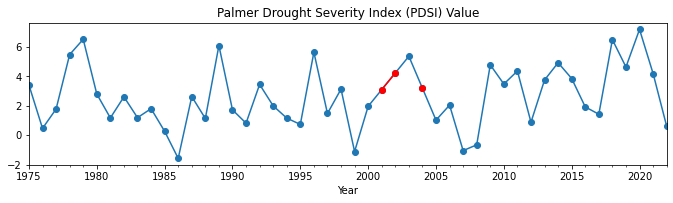

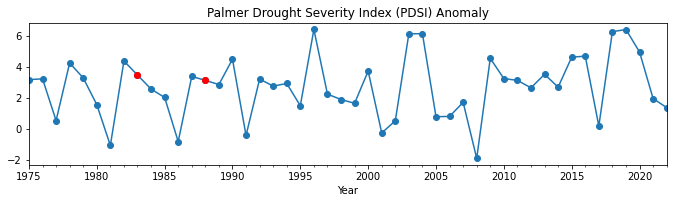

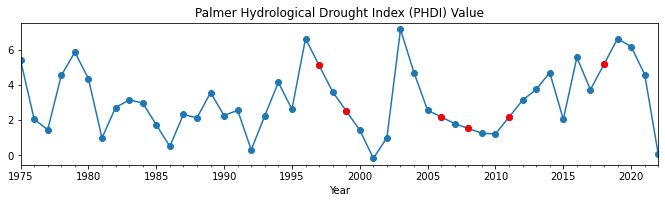

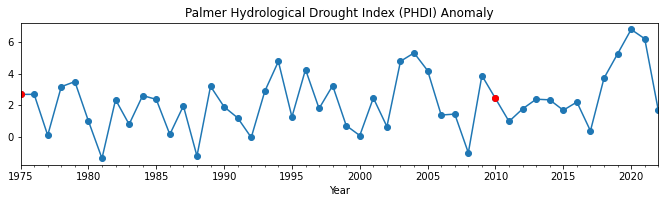

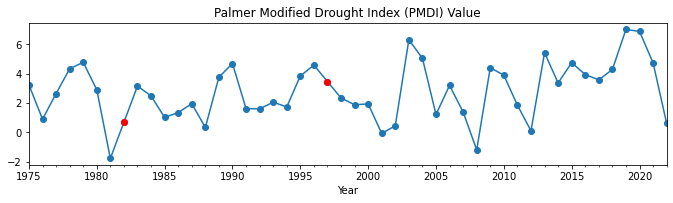

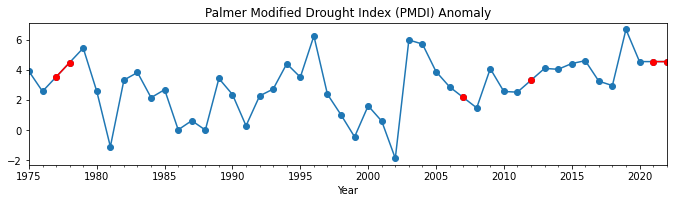

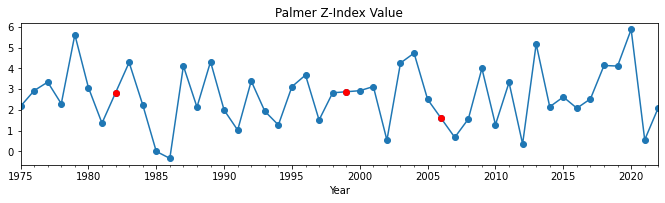

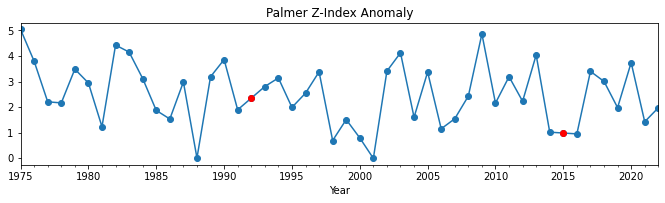

In [651]:
# VISUALIZING INTERPOLATED VALUES

for i,j in enumerate(colList[1:]):
    fig = plt.subplot(4,6,i+1)
    State_imp[j].plot(linestyle="-",figsize=(80,12),ax=fig,marker="o")
    State_imp[State_data.isnull()][j].plot(linestyle="-",figsize=(80,12),marker="o",c="r",ax=fig)
    plt.title(j)
    plt.show()

In [652]:
State_imp['t'] = np.round((State_imp.index - State_imp.index.min())/ np.timedelta64(1,"Y"))

In [653]:
from feature_engine.timeseries.forecasting import LagFeatures

lag_transformer = LagFeatures(variables=colList[1:],freq=['1YS','2YS','3YS','4YS','5YS'])
data_ = lag_transformer.fit_transform(State_imp)

In [42]:
data_.fillna(method="bfill",inplace=True)

data_.drop('State',axis=1,inplace=True)
# data_.isnull().sum().sort_values(ascending=False)

KeyError: "['State'] not found in axis"

In [655]:
train= data_[data_.index<pd.to_datetime("2003-01-01")]
test = data_[data_.index>=pd.to_datetime("2003-01-01")]

In [41]:
# train.corr()[colList[3]].sort_values(ascending=False)[:50]

In [658]:
features = [col for col in data_.columns if "lag" in col]
print(f"Number of features {len(features)}")

Number of features 115


## Feature Selection

In [659]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
data_scaled = sc.fit_transform(train[features+['t']])

In [660]:
y = train['Yield (Pounds/ Harvested Area)'].to_frame()
X = data_scaled

In [661]:
model = Lasso(alpha=0.1)
model.fit(X,y)

Lasso(alpha=0.1)

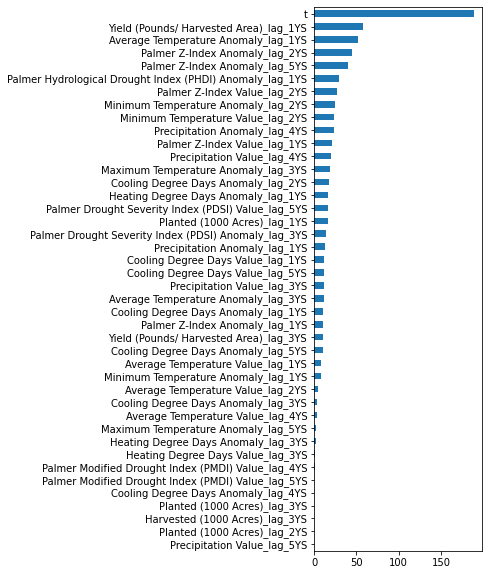

In [662]:
feat_importances = pd.Series(index=features+['t'], data=model.coef_)
imp_features = feat_importances.abs()\
               [(feat_importances.abs()>0)].iloc[::-1].\
               sort_values(ascending=True).\
               plot(kind="barh", figsize=(3, 10))

In [663]:
imp_features_list = list(feat_importances.abs()[(feat_importances.abs()>0)].iloc[::-1].index)

# Modelling

In [664]:
from lightgbm import LGBMRegressor
from sktime.transformations.series.time_since import TimeSince

In [665]:
forecast_start = train.iloc[-1].name+pd.DateOffset(months=12)
forecast_steps = 20
model = LGBMRegressor(
                        min_data_in_bin=5,
                        min_data_in_leaf=1,
                        boosting = "gbdt",
                        linear_tree = True,
                        linear_lambda = 0.01,
                        n_estimators = 100,
                        bagging_freq = 1,
                        bagging_fraction = 0.8,
    
)
forecast_horizon = pd.date_range(
   forecast_start , periods=forecast_steps, freq="YS"
)

In [666]:
df_train = data_[data_.index<forecast_start]
df_test = data_[data_.index>=forecast_start]

In [667]:
feature_lis = imp_features_list
feature_lis.append('t')

y_train = df_train['Yield (Pounds/ Harvested Area)']
X_train = df_train[feature_lis]

y_test = df_test['Yield (Pounds/ Harvested Area)']
X_test = df_test[feature_lis]

In [668]:
from sklearn.preprocessing import MinMaxScaler
sc =MinMaxScaler()

X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

In [669]:
model.fit(X_train_sc,y_train)

[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] min_data_in_leaf is set=1, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=1
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


LGBMRegressor(bagging_fraction=0.8, bagging_freq=1, boosting='gbdt',
              linear_lambda=0.01, linear_tree=True, min_data_in_bin=5,
              min_data_in_leaf=1)

In [670]:
def preprocess_pipeline(df,col=colList,sc=sc,ifl=list(imp_features_list)):
    
    lag_transformer = LagFeatures(variables=col[1:],freq=['1YS','2YS','3YS','4YS','5YS'])
    df = lag_transformer.fit_transform(df)
    
    df.fillna(method="bfill",inplace=True)
    
    df.drop('State',axis=1,inplace=True)
    
    predf = df.loc[:,ifl]
    
    return predf

In [671]:
forecast_horizon = pd.date_range(X_test.index.min(),periods=20,freq="YS")

train_df= State_imp[State_imp.index<pd.to_datetime("2003-01-01")]
test_df = State_imp[State_imp.index>=pd.to_datetime("2003-01-01")]

df_pred = train_df.copy()
df_pred = pd.concat([df_pred,test_df])

for forecast_time in forecast_horizon:
    X_test_ = preprocess_pipeline(df_pred)
    X_test_ = X_test_.loc[[forecast_time]]
    X_test_ = sc.transform(X_test_)
    y_pred = model.predict(X_test_)
#     print(y_pred)
    df_pred.loc[[forecast_time],'Yield (Pounds/ Harvested Area)'] = y_pred

In [672]:
y_forecast = df_pred[df_pred.index>=forecast_start]

In [673]:
y_forecast

,State,Planted (1000 Acres),Harvested (1000 Acres),Yield (Pounds/ Harvested Area),Average Temperature Value,Average Temperature Anomaly,Maximum Temperature Value,Maximum Temperature Anomaly,Minimum Temperature Value,Minimum Temperature Anomaly,...,Heating Degree Days Anomaly,Palmer Drought Severity Index (PDSI) Value,Palmer Drought Severity Index (PDSI) Anomaly,Palmer Hydrological Drought Index (PHDI) Value,Palmer Hydrological Drought Index (PHDI) Anomaly,Palmer Modified Drought Index (PMDI) Value,Palmer Modified Drought Index (PMDI) Anomaly,Palmer Z-Index Value,Palmer Z-Index Anomaly,t
Year,,,,,,,,,,,,,,,,,,,,,
2003-01-01,VA,89.0,85.0,712.575763,55.950000,0.366667,67.125000,2.558333,48.725000,4.133333,...,17.416667,5.367500,6.142500,7.167500,4.786667,6.316667,6.002500,4.256667,4.125000,28.0
2004-01-01,VA,82.0,88.5,639.052080,56.883333,2.300000,67.258333,3.691667,49.525000,3.933333,...,-4.000000,3.196667,6.140000,4.698333,5.317500,5.048333,5.734167,4.732500,1.600833,29.0
2005-01-01,VA,93.0,92.0,733.914497,58.933333,4.350000,69.800000,4.033333,48.050000,1.458333,...,6.916667,1.025833,0.800833,2.571667,4.190833,1.221667,3.907500,2.504167,3.372500,30.0
2006-01-01,VA,105.0,104.0,659.964479,57.575000,2.991667,71.941667,4.375000,47.183333,4.591667,...,-31.250000,2.045833,0.820833,2.189583,1.367500,3.204167,2.890000,1.589167,1.149167,31.0
2007-01-01,VA,60.0,59.0,638.197638,59.800000,3.216667,71.325000,3.758333,48.258333,4.666667,...,-21.666667,-1.046667,1.728333,1.807500,1.426667,1.388333,2.192500,0.674167,1.542500,32.0
2008-01-01,VA,61.0,60.0,835.308711,56.708333,1.125000,67.908333,2.341667,46.475000,1.883333,...,-7.083333,-0.652500,-1.877500,1.533333,-1.033333,-1.190833,1.495000,1.561667,2.430000,33.0
2009-01-01,VA,64.0,63.0,706.800745,59.158333,3.575000,67.650000,0.083333,46.683333,4.091667,...,6.833333,4.783333,4.558333,1.259167,3.878333,4.410833,4.096667,3.997500,4.865833,34.0
2010-01-01,VA,83.0,82.0,671.168044,58.925000,4.341667,68.066667,1.500000,47.791667,3.200000,...,15.416667,3.480000,3.255000,1.224167,2.419167,3.895833,2.581667,1.285833,2.154167,35.0
2011-01-01,VA,116.0,115.0,686.346745,58.983333,4.154167,71.933333,4.366667,48.041667,5.450000,...,-25.333333,4.365833,3.140833,2.182917,0.960000,1.853333,2.539167,3.321667,3.190000,36.0


In [674]:
# y_forecast['State'] = "NV"
# y_forecast['Yield (Pounds/ Harvested Area)'] = 0
# y_forecast

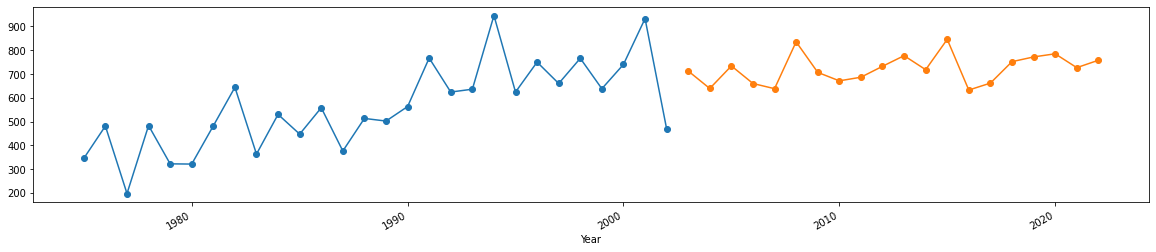

In [675]:
# RECURSIVE FORECASTING

plt.plot(y_train,label="train",linestyle="-",marker="o")
y_forecast['Yield (Pounds/ Harvested Area)'].plot(label="Prediction",figsize=(20,4),linestyle="-",marker="o")
# plt.plot(X_test.index,y_forecast,label="train",linestyle="-",marker="o")
plt.show()

In [676]:
# df = y_forecast.copy() 

In [677]:
df = pd.concat([df,y_forecast])

In [678]:
df = df.sort_values(by=["Year","State"])

In [679]:
df

,State,Planted (1000 Acres),Harvested (1000 Acres),Yield (Pounds/ Harvested Area),Average Temperature Value,Average Temperature Anomaly,Maximum Temperature Value,Maximum Temperature Anomaly,Minimum Temperature Value,Minimum Temperature Anomaly,...,Heating Degree Days Anomaly,Palmer Drought Severity Index (PDSI) Value,Palmer Drought Severity Index (PDSI) Anomaly,Palmer Hydrological Drought Index (PHDI) Value,Palmer Hydrological Drought Index (PHDI) Anomaly,Palmer Modified Drought Index (PMDI) Value,Palmer Modified Drought Index (PMDI) Anomaly,Palmer Z-Index Value,Palmer Z-Index Anomaly,t
Year,,,,,,,,,,,,,,,,,,,,,
2003-01-01,AL,525.0,510.0,549.132608,66.733333,1.475000,75.833333,1.033333,55.633333,3.933333,...,8.833333,5.057500,4.736667,5.936667,5.459167,6.582500,3.271667,5.014167,2.875000,28.0
2003-01-01,AR,980.0,945.0,857.515147,61.266667,3.616667,74.966667,0.366667,53.558333,1.841667,...,4.583333,4.019167,2.676667,1.060000,2.540000,2.038333,0.620000,0.772500,0.617500,28.0
2003-01-01,AZ,215.0,213.0,1287.418454,62.900000,4.275000,78.158333,4.383333,51.641667,2.208333,...,-10.000000,-0.618333,-1.799167,-0.618333,-1.827500,0.636667,-1.699167,0.370833,0.297500,28.0
2003-01-01,CA,550.0,545.0,1212.418100,62.425000,1.775000,74.850000,1.683333,48.991667,4.858333,...,-3.500000,2.254167,2.083333,0.785833,2.496667,1.045000,1.740833,2.925000,2.179167,28.0
2003-01-01,FL,104.5,92.0,527.186770,73.554167,3.791667,84.208333,2.533333,61.533333,2.066667,...,8.916667,3.474167,3.084167,6.261667,4.939167,5.923333,6.546667,4.397500,3.614167,28.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-01,OK,660.0,310.0,320.193581,62.900000,2.816667,78.133333,5.116667,48.683333,2.766667,...,3.583333,-0.355000,-2.042500,-0.355000,-2.168333,-0.256667,1.038333,0.125833,1.884167,47.0
2022-01-01,SC,270.0,265.0,680.832190,67.808333,3.791667,79.041667,2.608333,55.591667,5.008333,...,-12.083333,2.810833,1.106667,2.596667,1.772500,0.732500,-0.065833,1.554167,0.610000,47.0
2022-01-01,TN,335.0,325.0,470.851467,61.516667,3.475000,70.900000,1.491667,48.091667,2.191667,...,-2.000000,3.145833,3.346667,3.726667,2.779167,3.088333,4.300833,3.023333,3.728333,47.0


In [713]:
sub = pd.read_csv('submission.csv')
sub.head()

,Yield (Pounds/ Harvested Area),COTTON YIELD (Kg per ha),Cotton_Price[Dollar/ton]
0,0.0,0,0.0
1,0.0,0,0.0
2,0.0,0,0.0
3,0.0,0,0.0
4,0.0,0,0.0


In [714]:
# sub.drop("Yield (Pounds/ Harvested Area)",axis=1,inplace=True)

In [715]:
arr = np.array(df["Yield (Pounds/ Harvested Area)"])
arr = np.append(arr,np.zeros(2076))

In [716]:
sub["Yield (Pounds/ Harvested Area)"] = arr
sub.to_csv("subm.csv",index=False)

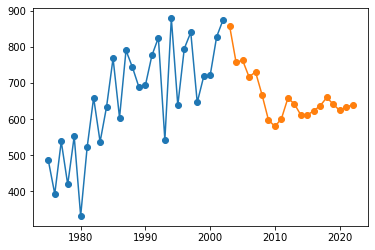

In [156]:
# Direct Forecasting 

y_forecast = model.predict(X_test_sc)
plt.plot(y_train,label="train",linestyle="-",marker="o")
# y_forecast['Yield (Pounds/ Harvested Area)'].plot(label="Prediction",linestyle="-",marker="o")
plt.plot(X_test.index,y_forecast,label="train",linestyle="-",marker="o")
plt.show()